# 🤖 Modeling :) 

### Authors:
| Name                          | Github user                                        |
|-------------------------------|----------------------------------------------------|
| Sergio Herreros Fernández     | [@SergioHerreros](https://github.com/SERGI0HERREROS)|
| Francisco Javier Luna Ortiz   | [@Lunao01](https://github.com/Lunao01)|
| Carlos Romero Navarro         | [@KarManiatic](https://github.com/KarManiatic)|
| Tatsiana Shelepen             | [@Naschkatzee](https://github.com/Naschkatzee) | 

<br>

## 1. Data

In [35]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings("ignore")

# Data
training_set_features_df = pd.read_csv('gold/training_set_features_df.csv') # training set features

training_set_labels_df = pd.read_csv('data/training_set_labels.csv') # training set labels

test_set_features_df = pd.read_csv('gold/test_set_features_df.csv') # test set features

In [36]:
test_set_features_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,2.0,0.0,1.0,1.0,7,1,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0.0,0.0,1.0,1.0,1,0,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,1,2.0,1.0,0.0,1.0,3,0,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1.0,1.0,0.0,0.0,3,1,1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,0,1.0,0.0,0.0,1.0,5,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,NaN,NaN,NaN,NaN,8,2,1.0,1.0
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,1,0.0,1.0,1.0,1.0,2,0,1.0,3.0
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,1.0,0.0,2,1,1.0,0.0
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,1.0,1.0,0.0,0.0,1,1,1.0,0.0


<br>

## 2. Approach

### 2.1. RandomForestClassifier

Modelling.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

In [38]:
## RandomForestClassifier - h1n1_vaccine
rf_classifier_h1n1_vaccine = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
rf_classifier_h1n1_vaccine.fit(training_set_features_df.iloc[:, 1:], training_set_labels_df['h1n1_vaccine'])

RandomForestClassifier(criterion='entropy', random_state=0)

In [39]:
## RandomForestClassifier - seasonal_vaccine
rf_classifier_seasonal_vaccine = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
rf_classifier_seasonal_vaccine.fit(training_set_features_df.iloc[:, 1:], training_set_labels_df['seasonal_vaccine'])

RandomForestClassifier(criterion='entropy', random_state=0)

In [40]:
rfc_y_pred_h1n1_vaccine = rf_classifier_h1n1_vaccine.predict_proba(test_set_features_df.iloc[:, 1:])

rfc_y_pred_seasonal_vaccine = rf_classifier_seasonal_vaccine.predict_proba(test_set_features_df.iloc[:, 1:])

Results.

In [41]:
print(rfc_y_pred_h1n1_vaccine)

[[0.84 0.16]
 [1.   0.  ]
 [0.47 0.53]
 ...
 [0.94 0.06]
 [0.96 0.04]
 [0.56 0.44]]


In [42]:
print(rfc_y_pred_seasonal_vaccine)

[[0.76 0.24]
 [0.97 0.03]
 [0.17 0.83]
 ...
 [0.71 0.29]
 [0.65 0.35]
 [0.49 0.51]]


In [43]:
y_preds = pd.DataFrame(
    {
        'respondent_id': test_set_features_df['respondent_id'],
        'h1n1_vaccine': rfc_y_pred_h1n1_vaccine[:, 1],
        'seasonal_vaccine':rfc_y_pred_seasonal_vaccine[:, 1],
    },

)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (26708, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.16,0.24
1,26708,0.00,0.03
2,26709,0.53,0.83
3,26710,0.59,0.86
4,26711,0.31,0.42


In [44]:
# Export the CSV.
y_preds.to_csv('./results/y_preds_df.csv', index=False)

Evaluation.

In [45]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='red', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

ValueError: Found input variables with inconsistent numbers of samples: [26707, 26708]

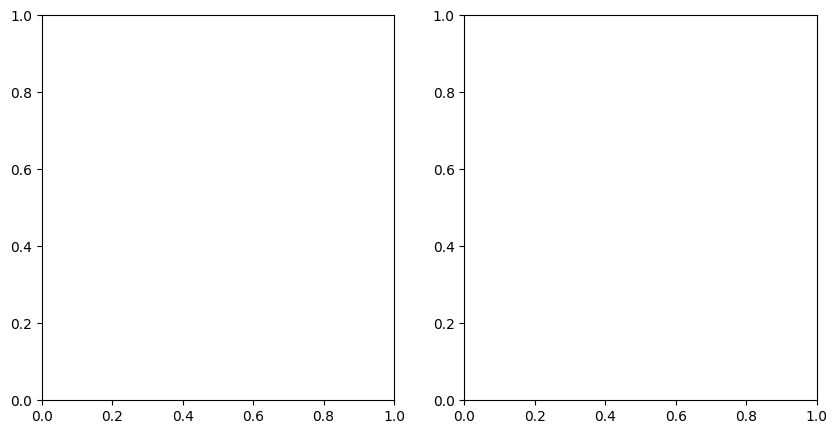

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plot_roc(
    training_set_labels_df['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0])

plot_roc(
    training_set_labels_df['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1])

fig.tight_layout()